<a href="https://colab.research.google.com/github/cheddur93/DS-Sprint-01-Dealing-With-Data/blob/master/ChadOwen_LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [3]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 24.9MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [8]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((44268, 3), (44370, 3), (51939, 3), (273, 33), (590, 16))

In [9]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,abw,1800,833
1,abw,1801,833
2,abw,1802,833
3,abw,1803,833
4,abw,1804,833


In [10]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [11]:
population.head()

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


In [12]:
pd.options.display.max_columns = None
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [13]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,http://www.gapminder.org/gapminder-world/docum...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,http://spreadsheets.google.com/pub?key=t4eF8H_...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
pd.merge?

In [0]:
df = pd.merge(income, lifespan)

In [16]:
income.shape, lifespan.shape, df.shape

((44268, 3), (44370, 3), (41790, 4))

In [17]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [18]:
entities[entities.country=='abw'].T

,1
country,abw
alt_5,NaN
alternative_1,NaN
alternative_2,NaN
alternative_3,NaN
alternative_4_cdiac,Aruba
arb1,NaN
arb2,NaN
arb3,NaN
arb4,NaN


In [19]:
entities.world_4region.value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [20]:
entities.world_6region.value_counts()

europe_central_asia         77
america                     53
sub_saharan_africa          53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [21]:
variables = ['country', 'name', 'world_6region','longitude','latitude']
entities[variables].head()

,country,name,world_6region,longitude,latitude
0,abkh,Abkhazia,europe_central_asia,NaN,NaN
1,abw,Aruba,america,-69.96667,12.50000
2,afg,Afghanistan,south_asia,66.00000,33.00000
3,ago,Angola,sub_saharan_africa,18.50000,-12.50000
4,aia,Anguilla,america,-63.05000,18.21667


In [22]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [0]:
df = pd.merge(df, population)

In [24]:
# Preview
pd.merge(df, entities[variables], how='inner', left_on='geo', right_on='country').head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region,longitude,latitude
0,abw,1800,833,34.42,19286,abw,Aruba,america,-69.96667,12.5
1,abw,1801,833,34.42,19286,abw,Aruba,america,-69.96667,12.5
2,abw,1802,833,34.42,19286,abw,Aruba,america,-69.96667,12.5
3,abw,1803,833,34.42,19286,abw,Aruba,america,-69.96667,12.5
4,abw,1804,833,34.42,19286,abw,Aruba,america,-69.96667,12.5


In [25]:
df = pd.merge(df, entities[variables], 
              how='inner', left_on='geo', right_on='country')

df.drop(columns=['geo', 'country'], inplace=True)

df.rename(columns={
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}, inplace=True)

df.shape

(41790, 8)

In [26]:
df.head()

,year,income,lifespan,population,country,region,longitude,latitude
0,1800,833,34.42,19286,Aruba,america,-69.96667,12.5
1,1801,833,34.42,19286,Aruba,america,-69.96667,12.5
2,1802,833,34.42,19286,Aruba,america,-69.96667,12.5
3,1803,833,34.42,19286,Aruba,america,-69.96667,12.5
4,1804,833,34.42,19286,Aruba,america,-69.96667,12.5


In [27]:
df.head()

,year,income,lifespan,population,country,region,longitude,latitude
0,1800,833,34.42,19286,Aruba,america,-69.96667,12.5
1,1801,833,34.42,19286,Aruba,america,-69.96667,12.5
2,1802,833,34.42,19286,Aruba,america,-69.96667,12.5
3,1803,833,34.42,19286,Aruba,america,-69.96667,12.5
4,1804,833,34.42,19286,Aruba,america,-69.96667,12.5


## Explore data

In [28]:
df.describe()

,year,income,lifespan,population,longitude,latitude
count,41790.000000,41790.000000,41790.000000,4.179000e+04,41790.000000,41790.00000
mean,1909.357406,4778.593683,43.267181,1.332550e+07,20.425241,19.17169
std,63.322969,10502.602580,16.394240,6.502349e+07,65.423500,23.96736
min,1800.000000,247.000000,1.000000,2.128000e+03,-175.000000,-42.00000
25%,1854.000000,884.000000,31.200000,3.760282e+05,-8.130570,4.00000
50%,1909.000000,1449.000000,35.500000,1.915244e+06,21.750000,18.00000
75%,1964.000000,3536.750000,56.340000,6.260147e+06,50.550000,39.75000
max,2018.000000,177522.000000,84.170000,1.415046e+09,178.000000,72.00000


In [29]:
df.describe(exclude=[np.number])

,country,region
count,41790,41790
unique,194,6
top,El Salvador,europe_central_asia
freq,219,10991


In [30]:
df.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatoria

In [31]:
usa = df[df.country=='United States']
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region,longitude,latitude
39399,1818,2258,39.41,9879049,United States,america,-98.5,39.76
39499,1918,9371,47.18,106721812,United States,america,-98.5,39.76
39599,2018,54898,79.14,326766748,United States,america,-98.5,39.76


In [32]:
china = df[df.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region,longitude,latitude
7120,1818,985,32.00,374161494,China,east_asia_pacific,105.0,35.0
7220,1918,989,22.13,462444535,China,east_asia_pacific,105.0,35.0
7320,2018,16018,76.92,1415045928,China,east_asia_pacific,105.0,35.0


## Plot visualization

In [33]:
now = df[df.year==2018]
print(now.shape)
now.sample(10)

(188, 8)


,year,income,lifespan,population,country,region,longitude,latitude
15032,2018,25498,81.34,11142161,Greece,europe_central_asia,22.00,39.00
24005,2018,1455,63.40,26262810,Madagascar,sub_saharan_africa,47.00,-20.00
22472,2018,2960,51.12,2263010,Lesotho,sub_saharan_africa,28.25,-29.50
28870,2018,38900,78.06,4829946,Oman,middle_east_north_africa,57.00,21.00
11747,2018,34742,83.23,46397452,Spain,europe_central_asia,-4.00,40.00
26242,2018,3671,70.57,4540068,Mauritania,sub_saharan_africa,-10.50,20.25
27118,2018,10549,65.69,2587801,Namibia,sub_saharan_africa,17.00,-22.00
9729,2018,32302,79.37,10625250,Czech Republic,europe_central_asia,15.00,49.75
19844,2018,3109,67.35,50950879,Kenya,sub_saharan_africa,38.00,1.00
2455,2018,16552,72.30,9923914,Azerbaijan,europe_central_asia,47.50,40.50


In [0]:
sns.relplot?

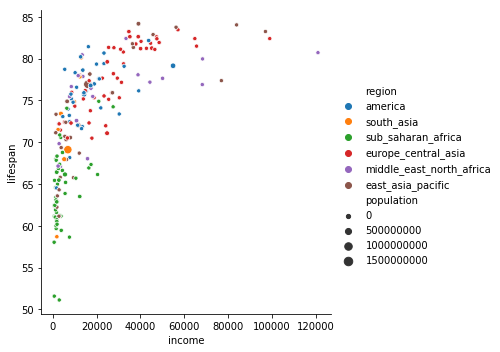

In [34]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',data=now);

## Analyze outliers

In [35]:
now[now.income > 80000]

,year,income,lifespan,population,country,region,longitude,latitude
22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia,6.13000,49.61167
23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific,113.54611,22.20056
31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa,51.52245,25.27932
33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific,103.85007,1.28967


In [36]:
entities[entities.name=='Macao, China'].T

,145
country,mac
alt_5,MACAU SPECIAL ADMINISTRATIVE REGION OF CHINA
alternative_1,Macau
alternative_2,Macao
alternative_3,"China, Macao SAR"
alternative_4_cdiac,Macau
arb1,"Macao SAR, China"
arb2,NaN
arb3,NaN
arb4,NaN


In [0]:
qatar = now[now.country=='Qatar']
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

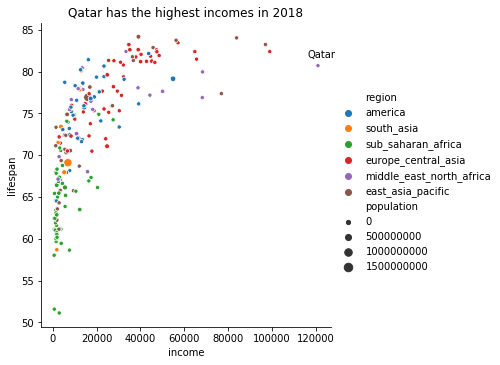

In [38]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)

plt.text(x=qatar_income-5000, y=qatar_lifespan+1, s='Qatar')

plt.title('Qatar has the highest incomes in 2018');

## Plot multiple years

In [0]:
# now = df[df.year==2018]

years = [1818, 1918, 2018]

centuries = df[df.year.isin(years)]

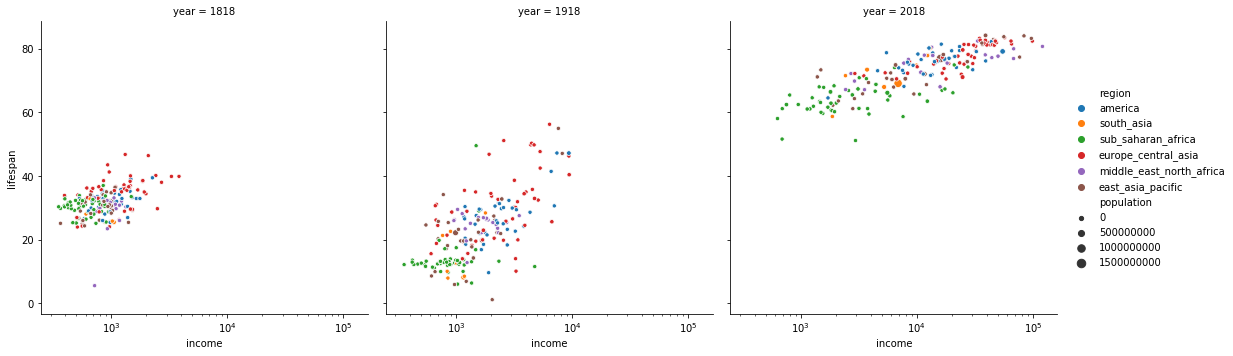

In [40]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            col='year', data=centuries)

plt.xscale('log');

## Consistent countries per year?

In [41]:
centuries.groupby('year').country.count()

year
1818    190
1918    190
2018    188
Name: country, dtype: int64

In [42]:
years_per_country = centuries.groupby('country').year.count()
years_per_country[years_per_country < 3]

country
Greenland    2
Taiwan       2
Name: year, dtype: int64

## Point out a story

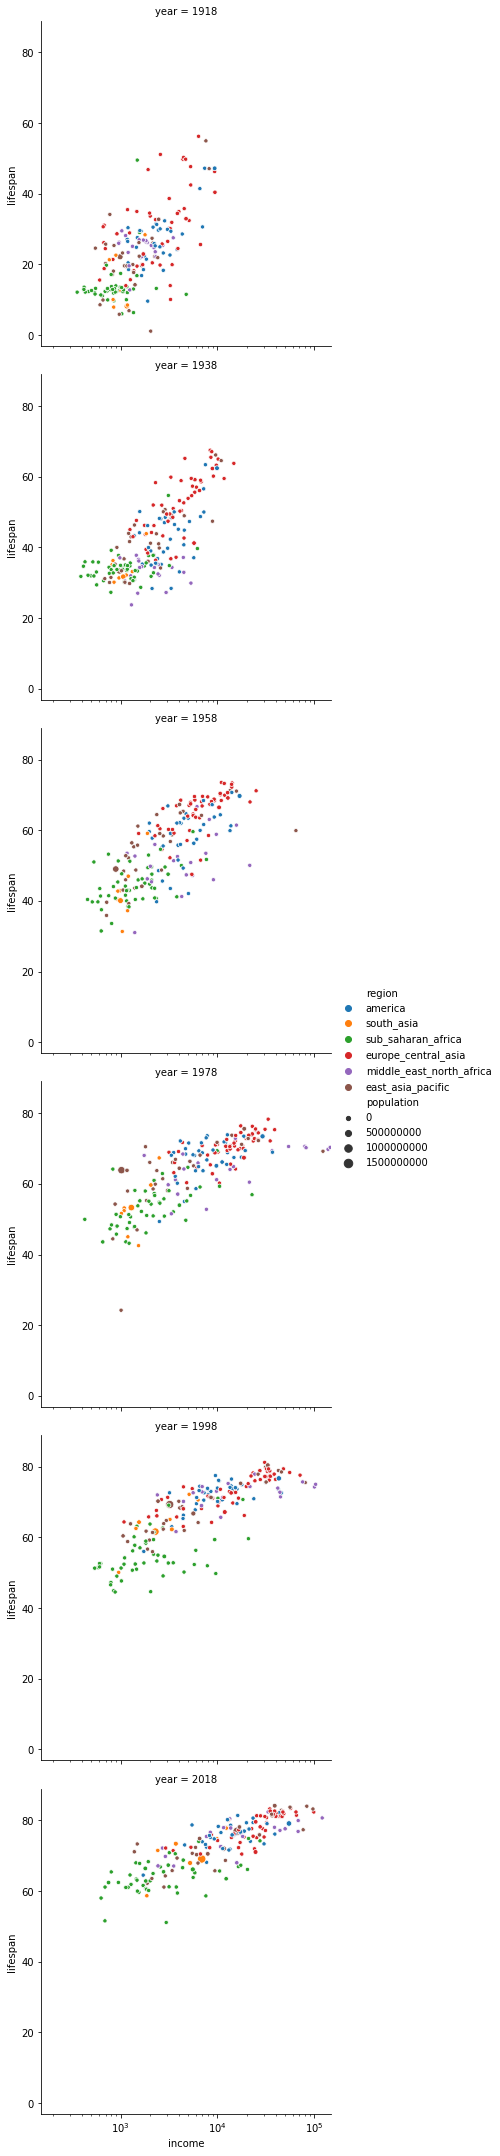

In [43]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

subset = df[df.year.isin(years)]

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            row='year', data=subset)

plt.xscale('log')
plt.xlim((150, 150000));

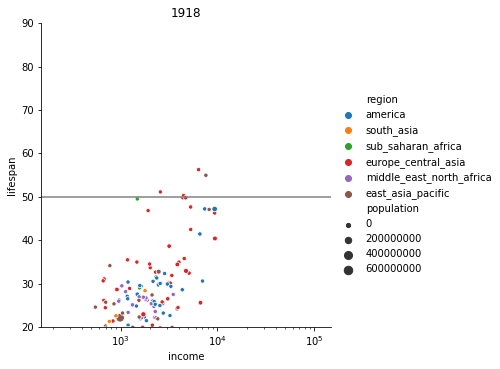

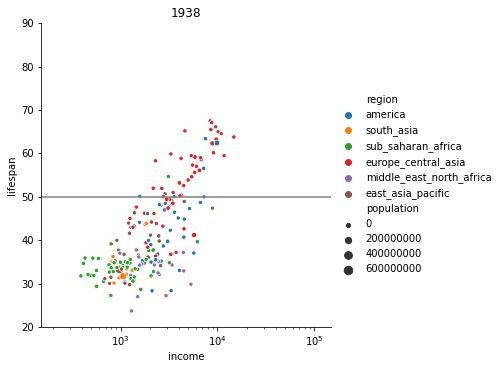

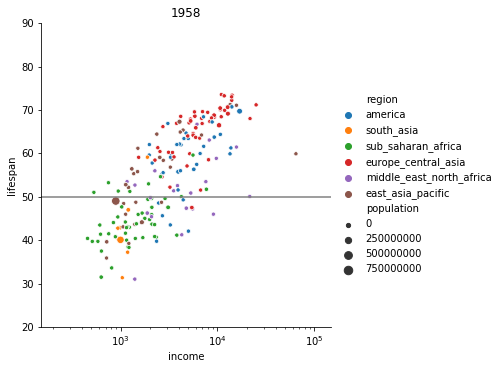

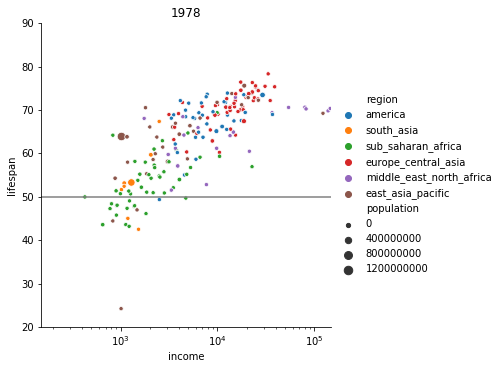

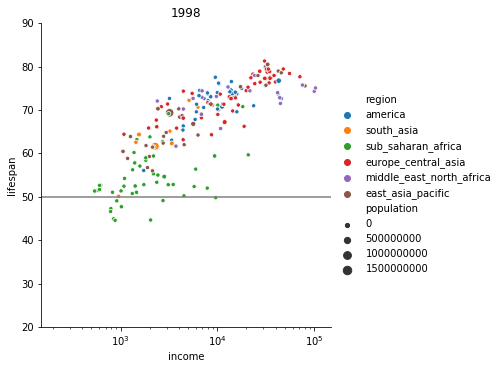

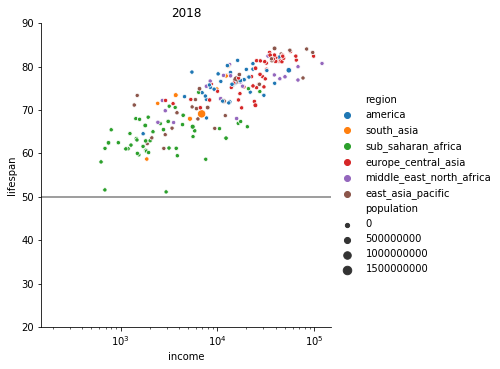

In [44]:
for year in years:

    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90))
    plt.title(year)
    plt.axhline(y=50, color='grey');

#### 100 years ago, few countires had lifespans _above_ 50 years

In [45]:
df[(df.year==1918) & (df.lifespan >= 50)]

,year,income,lifespan,population,country,region,longitude,latitude
1917,1918,7610,54.95,5066003,Australia,east_asia_pacific,135.0,-25.0
10333,1918,6393,56.24,3165276,Denmark,europe_central_asia,10.0,56.0
18211,1918,2576,51.11,115504,Iceland,europe_central_asia,-18.0,65.0
28113,1918,4479,50.28,2576646,Norway,europe_central_asia,10.0,62.0


#### Today, no countries have lifespans _below_ 50 years

In [46]:
df[(df.year==2018) & (df.lifespan < 50)]

,year,income,lifespan,population,country,region,longitude,latitude


## Get interactive with Google Colab

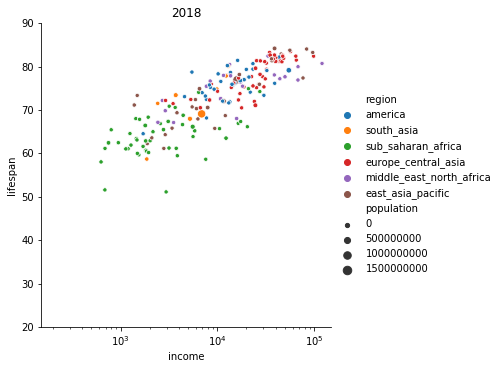

In [47]:
year = 2018 #@param {type:"slider", min:1800, max:2018, step:1}

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            data=df[df.year==year])

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20, 90))
plt.title(year);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

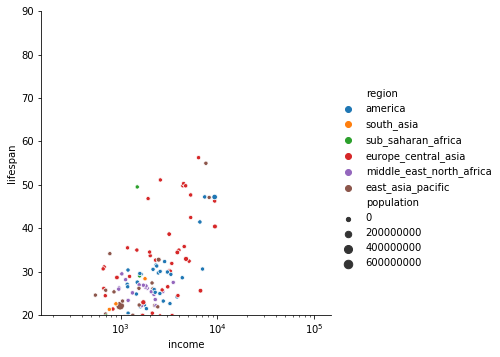

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

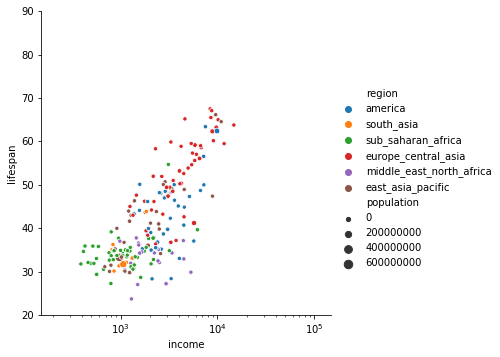

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

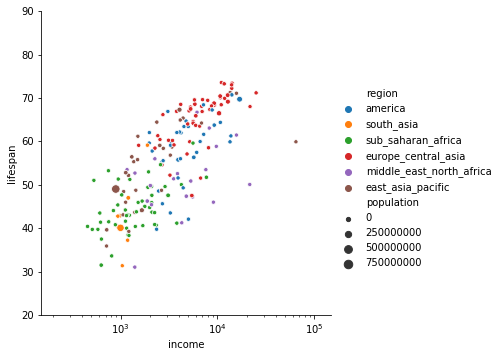

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

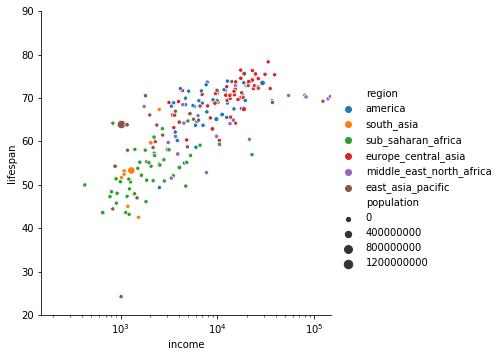

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

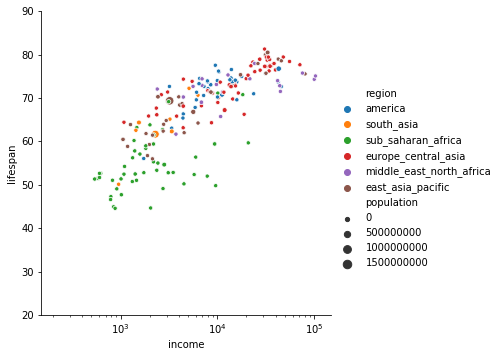

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

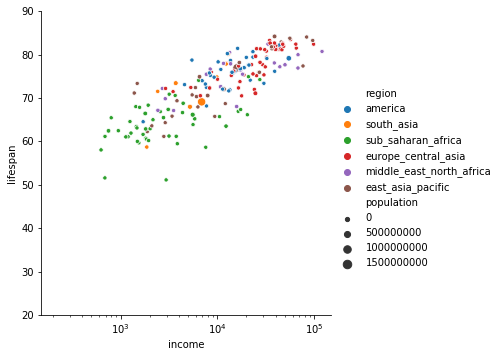

<IPython.core.display.Javascript object>

In [48]:
from google.colab import widgets
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90));

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

In [49]:
!apt-get update
!apt-get install libproj-dev
!apt-get install libgeos-dev
!GEOS_DIR=/usr/bin
!pip install cython
!pip install cartopy
!pip install shapely

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 247 kB in 2s (142 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove 

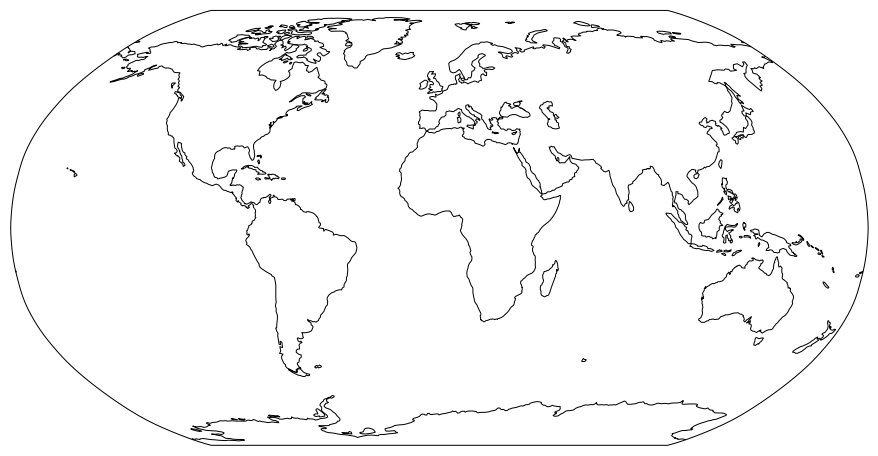

In [54]:
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize=(20,8))

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
plt.plot(x=now['longitude'],y=now['latitude'],alpha=5)

plt.show();